In [1]:
from matplotlib import pyplot as plt
import networkx as nx
from copy import deepcopy, copy

def calc(w,conn):
    seen = set(w)
    cnt = 0
    while len(allwires) != len(seen):
        cnt +=1
        if cnt == 150:
            return 0
        for g in list(conn):
            if all(wire in w for wire in conn[g]):
                x = w[conn[g].pop()]
                y = w[conn[g].pop()]
                if ins[g] == 'XOR':   ans = 1 if x != y else 0
                elif ins[g] == 'OR':  ans = 1 if (x == 1 or y == 1) else 0
                elif ins[g] == 'AND': ans = 1 if x == 1 and y == 1 else 0 
                else:                 print('error')
                w[g] = ans
                seen.add(g)
                del conn[g]
    return getvalue('z', w)

def getvalue(char,w):
    bits = sorted([(wire, w[wire]) for wire in w if wire.startswith(char)], reverse=True)
    return int(''.join([str(a[1]) for a in bits]),2)

In [2]:
def checker(search, a):
    assert len(bin(search)) == len(bin(a))
    for idx,(x,y) in enumerate(zip(bin(search)[::-1], bin(a)[::-1])):
        if x != y:
            return idx
    print('no differences')

def swap(sa,sb):
    conn[sa], conn[sb] = conn[sb], conn[sa]
    ins[sa], ins[sb] = ins[sb], ins[sa]

wires, gates = open("in.txt").read().split("\n\n")
w = {}

for wire in wires.split('\n'):
    x,y = wire.strip('\n').split(': ')
    w[x] = int(y)

conn = {}
ins = {}
edges = set()
allwires = set()
for gate in gates.split('\n'):
    w1, i, w2, _, g = gate.split(' ')
    assert g not in conn
    conn[g] = set([w1,w2])
    ins[g] = i
    allwires.add(w1)
    allwires.add(w2)
    allwires.add(g)
    edges.add((w1,g))
    edges.add((w2,g))
    
# did this visually by inspecting the graph
swap('z06', 'jmq')
swap('z13', 'gmh')
swap('rqf', 'cbd')
swap('z38','qrh')

a = calc(w.copy(), deepcopy(conn))
checker(getvalue('x',w)+getvalue('y',w),a)
for i in range(45):
    w['x'+str(i).zfill(2)] = 1
    w['y'+str(i).zfill(2)] = 1
a = calc(w.copy(), deepcopy(conn))
checker(getvalue('x',w)+getvalue('y',w),a)
for i in range(45):
    w['x'+str(i).zfill(2)] = 0
    w['y'+str(i).zfill(2)] = 0
a = calc(w.copy(), deepcopy(conn))
checker(getvalue('x', w)+getvalue('y',w),a)

no differences
no differences
no differences


In [3]:
','.join(sorted(['z06', 'jmq', 'z13','gmh', 'z38', 'qrh','cbd', 'rqf']))

'cbd,gmh,jmq,qrh,rqf,z06,z13,z38'

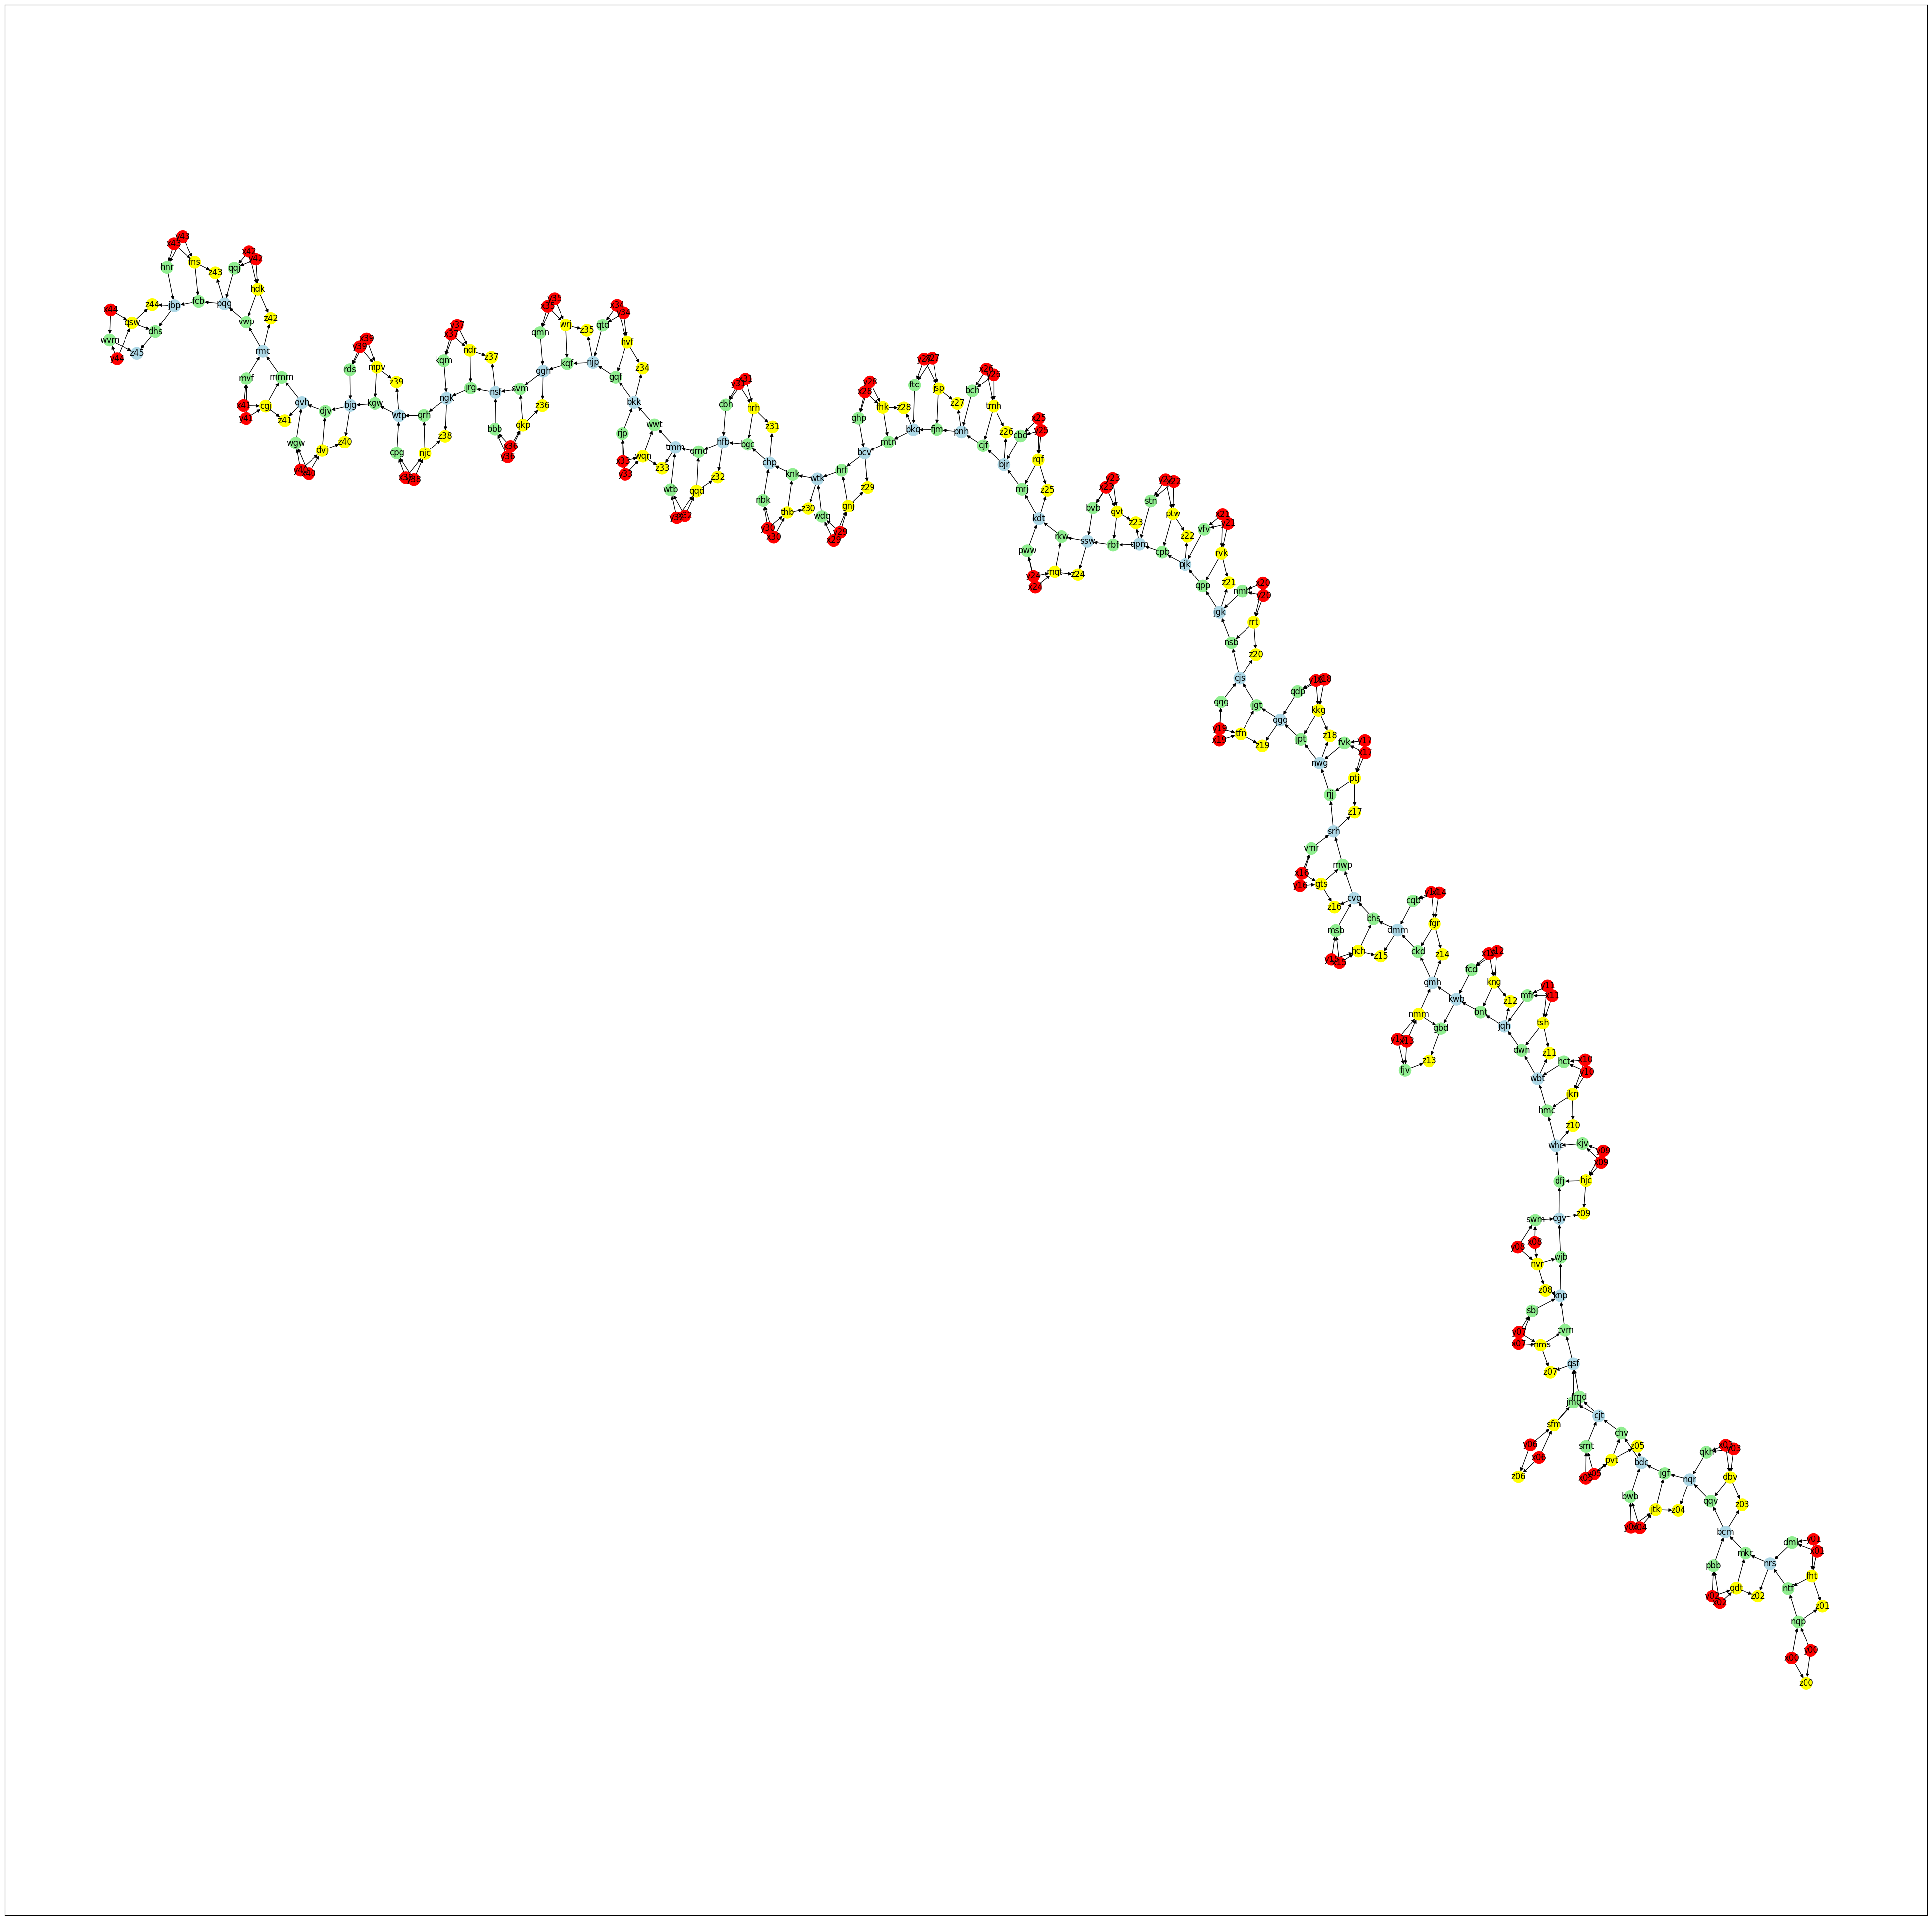

In [5]:
# this graph saved me because without visualisation wouldnt have been able to make this work
def visualize_graph(edges:set, labels=None):
    '''
    Plots graph.
    edges: set with tuples (fromnode, tonode)
    labels: optional dictionary with node descriptions. If None, the node variable names will be used

    If the names are passed and the node is not found, 'Missing'will be appended in the label
    
    Usage example:
        from aocutils.special import visualize_graph, labelize
        visualize_graph(edges, labelize(lines))
    '''
    missing = 'Missing'
    if not labels: 
        labels = {}
        missing = ''

    G = nx.DiGraph()
    for k,v in edges:
        weight = ''
        G.add_edge(labels.get(k, missing+str(k)), labels.get(v, missing+str(v)), weight=weight)
    pos = nx.nx_agraph.graphviz_layout(G,prog='neato', args ='')
    plt.figure(figsize=(50,50))
    color_map = []
    for node in G:
        if node in ins and ins[node] == 'XOR':
            color_map.append('yellow')
        elif node in ins and ins[node] == 'OR':
            color_map.append('lightblue') 
        elif node in ins and ins[node] == 'AND':
            color_map.append('lightgreen') 
        else:
            color_map.append('red') 
            
    
    nx.draw_networkx(G, pos,font_size=12, node_color=color_map)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,label_pos=0.5, font_size=12)
    plt.margins(0.01,0.1)
visualize_graph(edges)